In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.helpers import DATA_ROOT
from src.microstates import plot_microstate_maps
from src.recording import load_all_data

plt.rcParams["figure.figsize"] = (20, 9)
plt.style.use("papers")
plt.rcParams["legend.frameon"] = False

EXCLUDE_SUBJECTS = [4, 13, 14, 20, 22]

In [2]:
# clinical scales correlate with I/P data

In [3]:
ms_inga = pd.read_csv("../results-inga-povilas/temporal_results.csv")
ms_inga[["cond", "subject", "time", "bull"]] = ms_inga["DataSet"].str.split(
    "_", n=3, expand=True
)
ms_inga = ms_inga.drop(
    [
        "DataSet",
        "bull",
        "Subject",
        "Group",
        "Condition",
        "Template",
        "SortInfo",
    ],
    axis=1,
)
ms_inga["subject"] = ms_inga["subject"].astype(int)
ms_inga["session"] = ms_inga["cond"] + "-" + ms_inga["time"]
ms_inga

,ExpVar,TotalTime,Duration_1,Duration_2,Duration_3,Duration_4,MeanDuration,Occurrence_1,Occurrence_2,Occurrence_3,...,DeltaTM_3->3,DeltaTM_3->4,DeltaTM_4->1,DeltaTM_4->2,DeltaTM_4->3,DeltaTM_4->4,cond,subject,time,session
0,0.781090,36.13672,0.038866,0.036591,0.034547,0.045850,0.039580,6.060318,6.254027,5.147119,...,NaN,0.005406,0.000257,0.004506,-0.004423,NaN,PLA,1,T1,PLA-T1
1,0.808344,36.35156,0.036003,0.039547,0.031429,0.047205,0.039685,5.584354,6.657210,4.814098,...,NaN,0.000187,-0.006350,0.007203,-0.000500,NaN,PLA,1,T2,PLA-T2
2,0.774093,36.48828,0.045609,0.040001,0.038616,0.043734,0.042134,5.919709,5.590836,5.508618,...,NaN,0.008130,-0.004762,0.014578,-0.010645,NaN,PLA,1,T3,PLA-T3
3,0.791479,36.19141,0.039567,0.036381,0.029904,0.042787,0.037897,5.774852,7.405073,4.890664,...,NaN,-0.007765,-0.007432,0.020738,-0.014023,NaN,PLA,1,T4,PLA-T4
4,0.792942,36.37891,0.040507,0.037712,0.037019,0.044282,0.040021,6.542253,5.882530,5.937507,...,NaN,0.004368,-0.000849,0.011981,-0.010840,NaN,PLA,1,T5,PLA-T5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.774101,36.72656,0.043157,0.040571,0.046265,0.048077,0.044734,5.091683,5.146139,6.099128,...,NaN,0.005097,-0.003408,-0.004305,0.006822,NaN,PSI,21,T1,PSI-T1
146,0.772291,35.32422,0.031088,0.023223,0.025638,0.035609,0.029910,8.860776,6.199712,7.388698,...,NaN,0.008491,0.010156,-0.010222,-0.000504,NaN,PSI,21,T2,PSI-T2
147,0.785702,36.08203,0.039669,0.034708,0.031975,0.039172,0.036743,7.676951,5.071777,6.568366,...,NaN,0.009610,0.012081,-0.002805,-0.008980,NaN,PSI,21,T3,PSI-T3
148,0.835024,37.26172,0.053360,0.042943,0.034536,0.073835,0.054476,5.608974,4.132928,2.871580,...,NaN,0.000547,0.016072,-0.002953,-0.012662,NaN,PSI,21,T4,PSI-T4


In [5]:
ms_me = pd.read_csv("../results_csv/microstates/ms_stats_run.csv", index_col=0)
ms_me

,subject,session,microstate,var_GFP,var_total,template_corr,coverage,occurrence,lifespan,transition->A,transition->B,transition->C,transition->D,ms_opts
0,2,PLA-T1,A,0.634153,0.575581,0.742195,0.374670,6.099404,61.427382,0.936409,0.020068,0.018504,0.025020,"(1.0, 40.0, 4)"
1,2,PLA-T1,B,0.634153,0.575581,0.739244,0.189630,4.724539,39.930556,0.038640,0.902628,0.031427,0.027306,"(1.0, 40.0, 4)"
2,2,PLA-T1,C,0.634153,0.575581,0.933068,0.201250,4.799531,41.931152,0.040757,0.028142,0.906841,0.024260,"(1.0, 40.0, 4)"
3,2,PLA-T1,D,0.634153,0.575581,0.968745,0.234450,4.999512,46.619818,0.035402,0.022907,0.024990,0.916701,"(1.0, 40.0, 4)"
0,2,PLA-T2,A,0.662984,0.610416,0.918371,0.275168,5.199492,52.922175,0.926189,0.020582,0.029454,0.023776,"(1.0, 40.0, 4)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,21,PSI-T3,D,0.706588,0.658144,0.898704,0.378674,8.374182,45.237650,0.025786,0.038680,0.021919,0.913615,"(1.0, 40.0, 4)"
0,21,PSI-T2,A,0.728025,0.665286,0.823584,0.233669,7.549263,30.952504,0.873799,0.046803,0.039281,0.040117,"(1.0, 40.0, 4)"
1,21,PSI-T2,B,0.728025,0.665286,0.767772,0.244507,8.149204,30.003834,0.042332,0.869808,0.043131,0.044728,"(1.0, 40.0, 4)"
2,21,PSI-T2,C,0.728025,0.665286,0.849585,0.269310,8.124207,32.974055,0.034820,0.040624,0.882118,0.042437,"(1.0, 40.0, 4)"


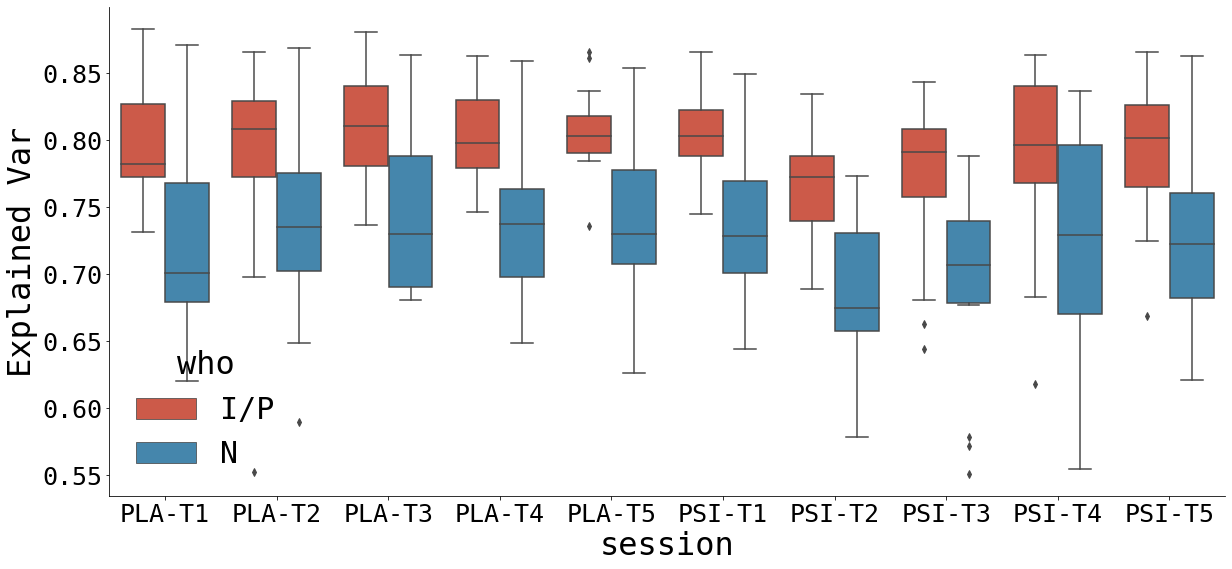

In [6]:
var1 = (
    ms_inga[["session", "subject", "ExpVar"]]
    .rename(columns={"ExpVar": "I/P"})
    .set_index(["subject", "session"])
)
var2 = (
    ms_me[["session", "subject", "var_GFP"]]
    .drop_duplicates()
    .rename(columns={"var_GFP": "N"})
    .set_index(["subject", "session"])
)
var = (
    pd.merge(var1, var2, left_index=True, right_index=True)
    .reset_index()
    .melt(
        id_vars=["subject", "session"],
        var_name="who",
        value_name="Explained Var",
    )
)
sns.boxplot(data=var, x="session", y="Explained Var", hue="who")
sns.despine()

<AxesSubplot:xlabel='session', ylabel='Expl. Var: Pearson'>

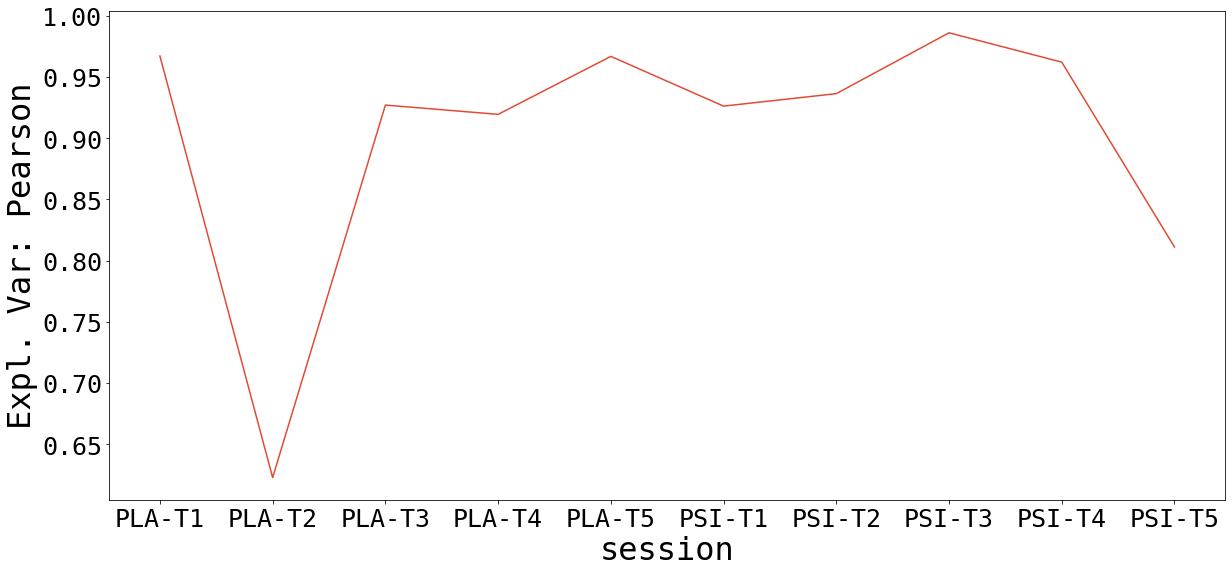

In [38]:
sns.lineplot(
    data=var.pivot(
        index=["session", "subject"], columns="who", values="Explained Var"
    )
    .groupby("session")
    .corr()
    .loc[(slice(None), "N"), "I/P"]
    .reset_index()
    .drop("who", axis=1)
    .rename(columns={"I/P": "Expl. Var: Pearson"}),
    x="session",
    y="Expl. Var: Pearson",
)

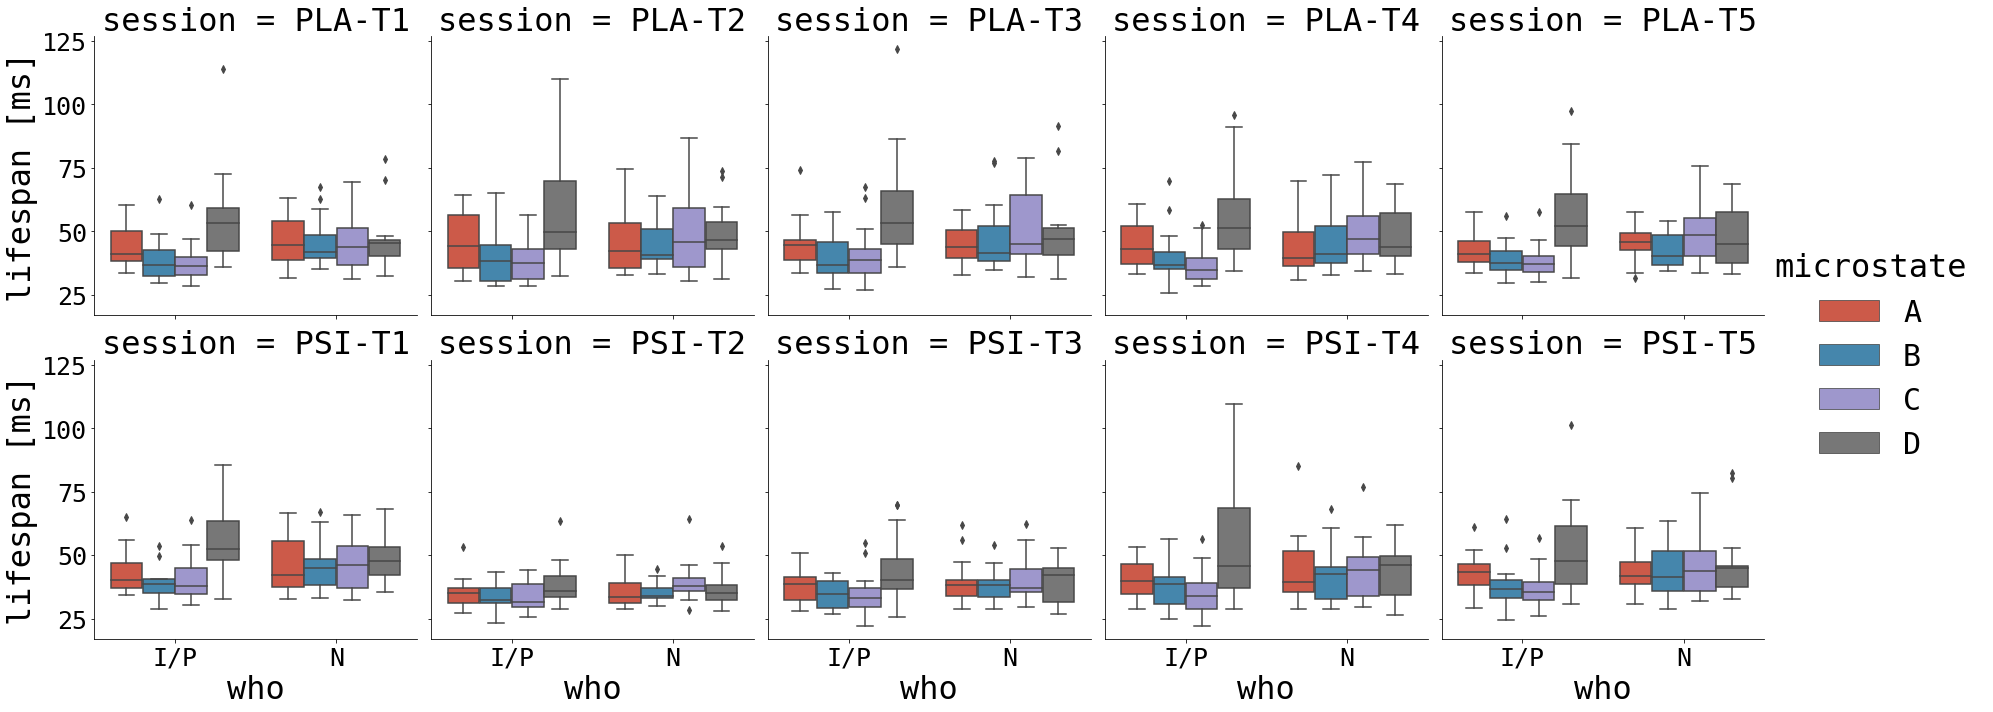

In [39]:
lif1 = (
    ms_inga[
        [
            "session",
            "subject",
            "Duration_1",
            "Duration_2",
            "Duration_3",
            "Duration_4",
        ]
    ]
    .melt(
        id_vars=["session", "subject"],
        var_name="microstate",
        value_name="lifespan",
    )
    .replace(
        {
            "Duration_1": "A",
            "Duration_2": "B",
            "Duration_3": "C",
            "Duration_4": "D",
        }
    )
    .set_index(["subject", "session", "microstate"])
    .sort_index()
    .rename(columns={"lifespan": "I/P"})
    * 1000.0
)
lif2 = (
    ms_me[["session", "subject", "microstate", "lifespan"]]
    .set_index(["subject", "session", "microstate"])
    .sort_index()
    .rename(columns={"lifespan": "N"})
)
lif = (
    pd.merge(lif1, lif2, left_index=True, right_index=True)
    .reset_index()
    .melt(
        id_vars=["subject", "session", "microstate"],
        var_name="who",
        value_name="lifespan [ms]",
    )
)
sns.catplot(
    data=lif,
    x="who",
    y="lifespan [ms]",
    hue="microstate",
    col="session",
    col_wrap=5,
    kind="box",
)

<AxesSubplot:xlabel='session', ylabel='lifepsan: Pearson'>

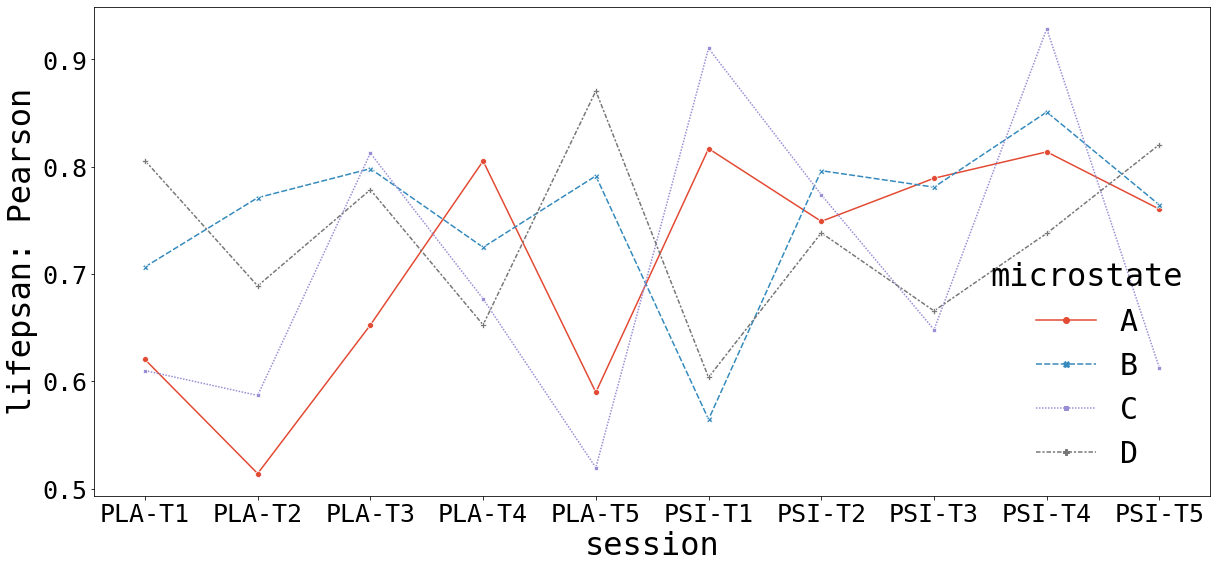

In [53]:
sns.lineplot(
    data=lif.pivot(
        index=["session", "microstate", "subject"],
        columns="who",
        values="lifespan [ms]",
    )
    .groupby(["session", "microstate"])
    .corr()
    .loc[(slice(None), slice(None), "N"), "I/P"]
    .reset_index()
    .drop("who", axis=1)
    .rename(columns={"I/P": "lifepsan: Pearson"}),
    x="session",
    y="lifepsan: Pearson",
    hue="microstate",
    markers=True,
    style="microstate",
)

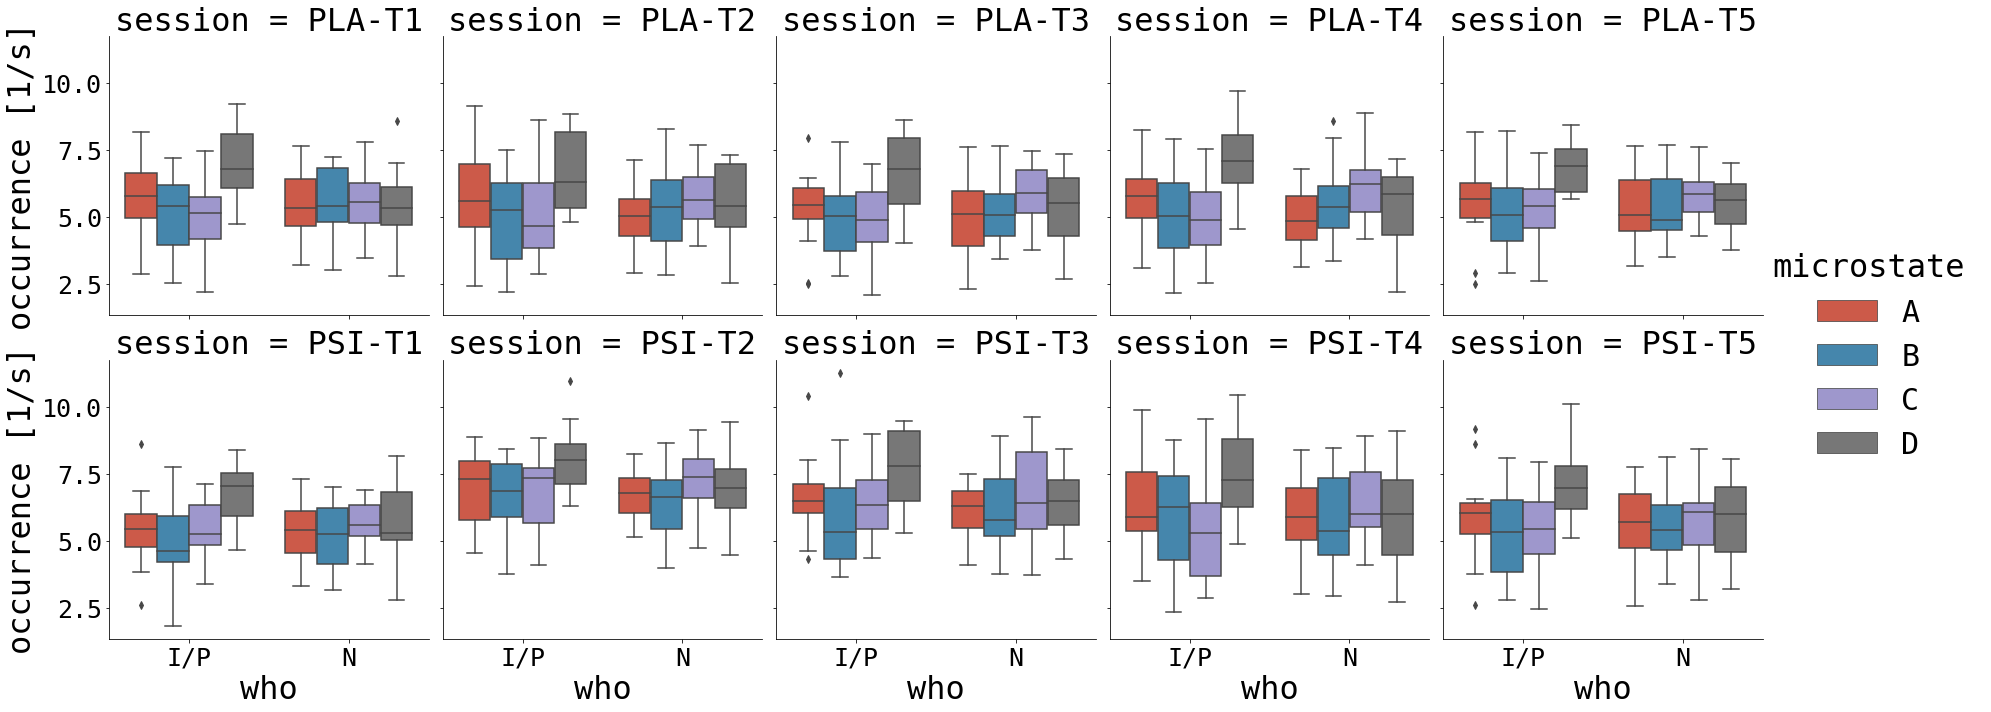

In [54]:
occ1 = (
    ms_inga[
        [
            "session",
            "subject",
            "Occurrence_1",
            "Occurrence_2",
            "Occurrence_3",
            "Occurrence_4",
        ]
    ]
    .melt(
        id_vars=["session", "subject"],
        var_name="microstate",
        value_name="occurrence",
    )
    .replace(
        {
            "Occurrence_1": "A",
            "Occurrence_2": "B",
            "Occurrence_3": "C",
            "Occurrence_4": "D",
        }
    )
    .set_index(["subject", "session", "microstate"])
    .sort_index()
    .rename(columns={"occurrence": "I/P"})
)
occ2 = (
    ms_me[["session", "subject", "microstate", "occurrence"]]
    .set_index(["subject", "session", "microstate"])
    .sort_index()
    .rename(columns={"occurrence": "N"})
)
occ = (
    pd.merge(occ1, occ2, left_index=True, right_index=True)
    .reset_index()
    .melt(
        id_vars=["subject", "session", "microstate"],
        var_name="who",
        value_name="occurrence [1/s]",
    )
)
sns.catplot(
    data=occ,
    x="who",
    y="occurrence [1/s]",
    hue="microstate",
    col="session",
    col_wrap=5,
    kind="box",
)

<AxesSubplot:xlabel='session', ylabel='occurrence: Pearson'>

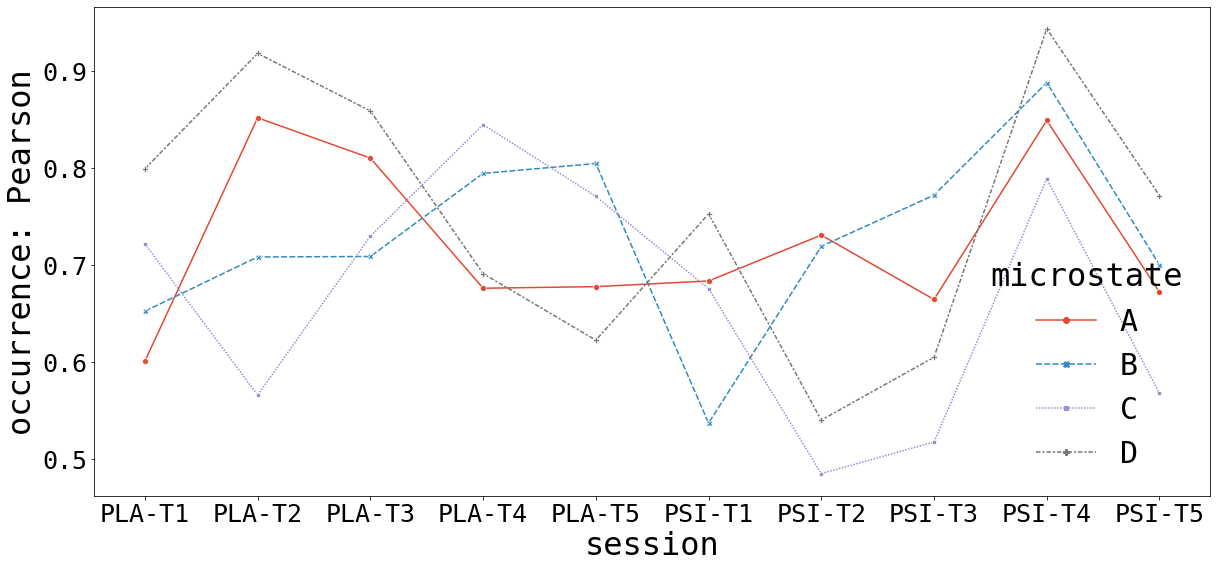

In [55]:
sns.lineplot(
    data=occ.pivot(
        index=["session", "microstate", "subject"],
        columns="who",
        values="occurrence [1/s]",
    )
    .groupby(["session", "microstate"])
    .corr()
    .loc[(slice(None), slice(None), "N"), "I/P"]
    .reset_index()
    .drop("who", axis=1)
    .rename(columns={"I/P": "occurrence: Pearson"}),
    x="session",
    y="occurrence: Pearson",
    hue="microstate",
    markers=True,
    style="microstate",
)

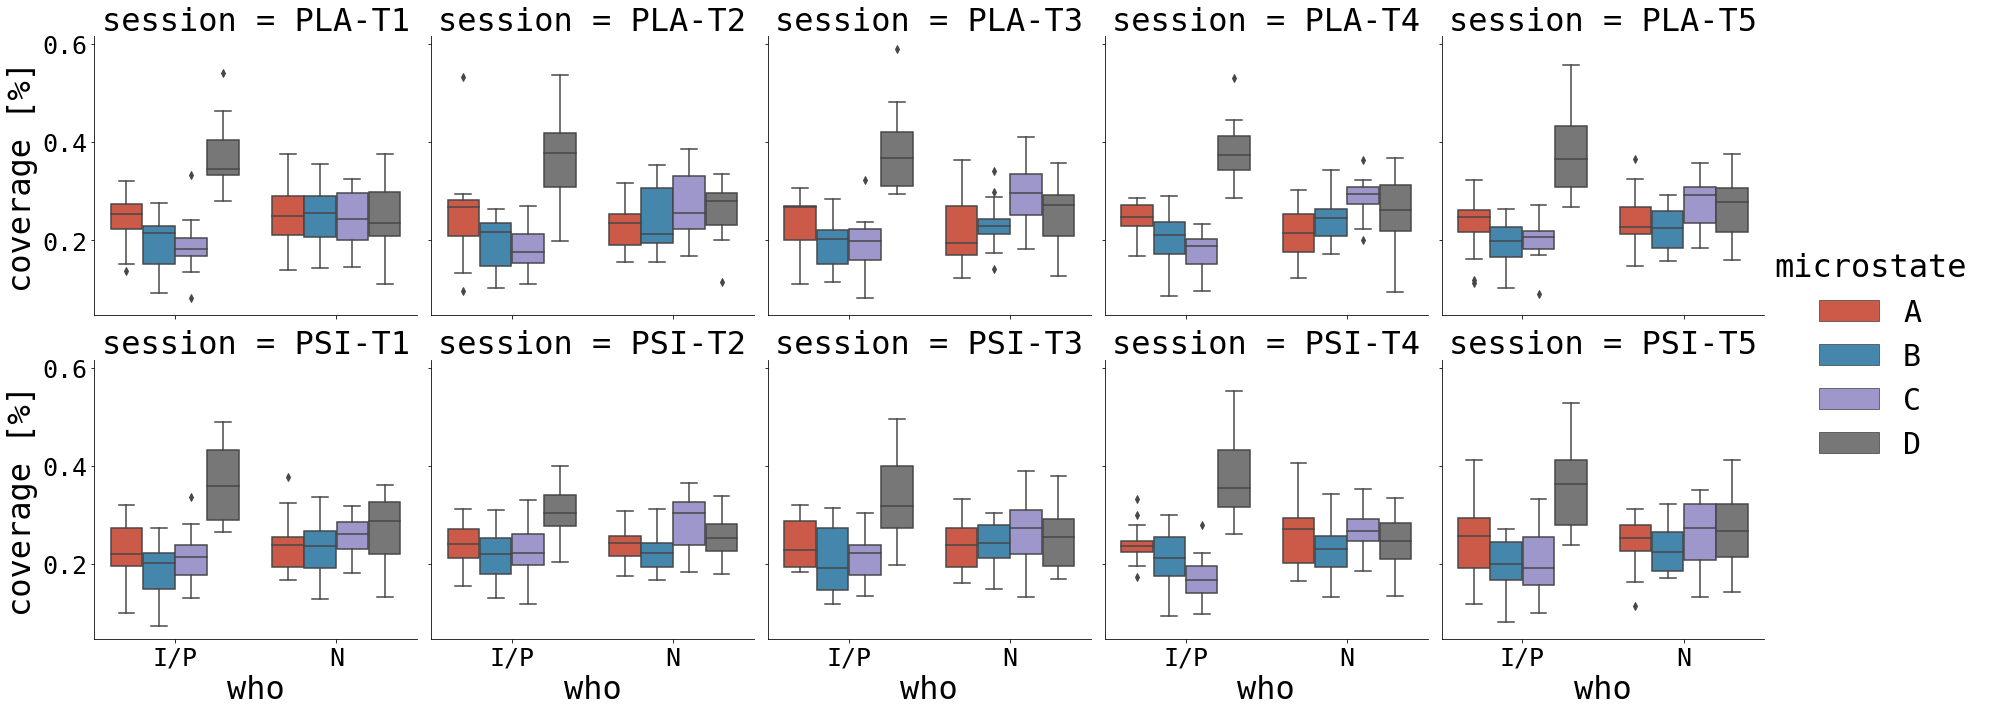

In [56]:
cov1 = (
    ms_inga[
        [
            "session",
            "subject",
            "Contribution_1",
            "Contribution_2",
            "Contribution_3",
            "Contribution_4",
        ]
    ]
    .melt(
        id_vars=["session", "subject"],
        var_name="microstate",
        value_name="contribution",
    )
    .replace(
        {
            "Contribution_1": "A",
            "Contribution_2": "B",
            "Contribution_3": "C",
            "Contribution_4": "D",
        }
    )
    .set_index(["subject", "session", "microstate"])
    .sort_index()
    .rename(columns={"contribution": "I/P"})
)
cov2 = (
    ms_me[["session", "subject", "microstate", "coverage"]]
    .set_index(["subject", "session", "microstate"])
    .sort_index()
    .rename(columns={"coverage": "N"})
)
cov = (
    pd.merge(cov1, cov2, left_index=True, right_index=True)
    .reset_index()
    .melt(
        id_vars=["subject", "session", "microstate"],
        var_name="who",
        value_name="coverage [%]",
    )
)
sns.catplot(
    data=cov,
    x="who",
    y="coverage [%]",
    hue="microstate",
    col="session",
    col_wrap=5,
    kind="box",
)

<AxesSubplot:xlabel='session', ylabel='coverage: Pearson'>

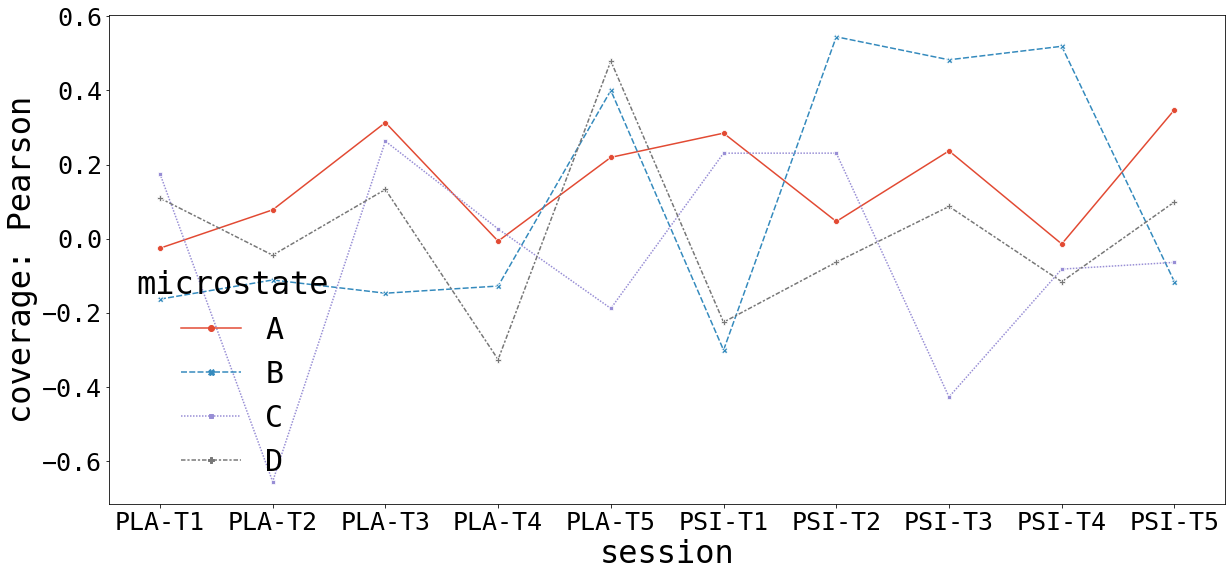

In [57]:
sns.lineplot(
    data=cov.pivot(
        index=["session", "microstate", "subject"],
        columns="who",
        values="coverage [%]",
    )
    .groupby(["session", "microstate"])
    .corr()
    .loc[(slice(None), slice(None), "N"), "I/P"]
    .reset_index()
    .drop("who", axis=1)
    .rename(columns={"I/P": "coverage: Pearson"}),
    x="session",
    y="coverage: Pearson",
    hue="microstate",
    markers=True,
    style="microstate",
)